In [85]:
# Setup for a bar cammed between parallel walls. 
# F_L is force on left end. F_R is force on right end.
# Left end is assumed to be a fixed pivot point
# Right end is assumed to see forces according to a friction coefficient µ

import sympy as sp
import numpy as np

# Define the variables
F_L_y, F_R_y, F_a = sp.symbols('F_L_y F_R_y F_a')
F_L_x, F_R_x = sp.symbols('F_L_x F_R_x')
r, x = sp.symbols('r x') 
theta, mu = sp.symbols(r'\theta \mu')


# Define the equations
eq1 = sp.Eq(F_L_y + F_R_y - F_a, 0)
eq2 = sp.Eq(F_L_x - F_R_x, 0)
eq3 = sp.Eq((r + x) * F_R_y * sp.cos(theta) + (r + x) * F_R_x * sp.sin(theta) - r * F_a * sp.cos(theta), 0)
eq4 = sp.Eq(F_R_y, mu * F_R_x)

# Solve the system of equations
solution = sp.solve([eq1, eq2, eq3, eq4], (F_L_y, F_L_x, F_R_y, F_R_x, F_a))

solution

{F_L_x: F_a*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta)),
 F_L_y: F_a*(\mu*x*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta)) + r*sin(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta)) + x*sin(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))),
 F_R_x: F_a*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta)),
 F_R_y: F_a*\mu*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))}

In [86]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def plot_sympy_expression(expr, x_var, y_var, x_range, y_range, sub_dict):
    """
    Plots a SymPy expression with specified values for some variables, while 
    using the remaining variables to represent the x and y axes.

    Parameters:
    -----------
    expr : sympy.Expr
        The SymPy expression to plot.
    x_var : sympy.Symbol
        The variable to be used for the x-axis.
    y_var : sympy.Symbol
        The variable to be used for the y-axis.
    x_range : tuple
        A tuple specifying the range of values for the x-axis in the form (x_min, x_max).
    y_range : tuple
        A tuple specifying the range of values for the y-axis in the form (y_min, y_max).
    sub_dict : dict
        A dictionary where the keys are SymPy Symbols and the values are the numerical values 
        to be substituted for those variables in the expression.

    Returns:
    --------
    None
    """

    # Substitute the given variable values into the expression
    expr_substituted = expr.subs(sub_dict)

    # Convert the sympy expression to a lambda function for numerical evaluation
    f = sp.lambdify((x_var, y_var), expr_substituted, "numpy")

    # Create a grid of x and y values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate the function on the grid
    Z = f(X, Y)

    # Plotting the result
    plt.figure(figsize=(8, 6))
    # Set the font to a default that supports a wide range of characters
    plt.rcParams['font.family'] = 'DejaVu Sans'
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel(rf'${str(x_var)}$')
    plt.ylabel(rf'${str(y_var)}$')
    plt.title(rf'${sp.latex(expr)}$ | ${sub_dict}$')
    plt.show()

# Example usage
# x, y, z = sp.symbols('x y z')
# expr = sp.sin(x*y) + z

# plot_sympy_expression(expr, x, y, x_range=(0, 10), y_range=(0, 10), z=1)

In [87]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def plot_sympy_expression(expr, x_var, y_var, x_range, y_range, sub_dict, above=None, below=None):
    """
    Plots a SymPy expression with specified values for some variables, while 
    using the remaining variables to represent the x and y axes.

    Parameters:
    -----------
    expr : sympy.Expr
        The SymPy expression to plot.
    x_var : sympy.Symbol
        The variable to be used for the x-axis.
    y_var : sympy.Symbol
        The variable to be used for the y-axis.
    x_range : tuple
        A tuple specifying the range of values for the x-axis in the form (x_min, x_max).
    y_range : tuple
        A tuple specifying the range of values for the y-axis in the form (y_min, y_max).
    sub_dict : dict
        A dictionary where the keys are SymPy Symbols and the values are the numerical values 
        to be substituted for those variables in the expression.
    above : float, optional
        If specified, highlights the region where the expression is greater than or equal to this value.
    below : float, optional
        If specified, highlights the region where the expression is less than or equal to this value.

    Returns:
    --------
    None
    """

    # Substitute the given variable values into the expression
    expr_substituted = expr.subs(sub_dict)

    # Convert the sympy expression to a lambda function for numerical evaluation
    f = sp.lambdify((x_var, y_var), expr_substituted, "numpy")

    # Create a grid of x and y values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate the function on the grid
    Z = f(X, Y)

    # Plotting the result
    plt.figure(figsize=(8, 6))
    plt.rcParams['font.family'] = 'DejaVu Sans'
    
    if above is not None:
        Z_masked = np.ma.masked_where(Z < above, Z)  # Mask regions where Z < above
        cp = plt.contourf(X, Y, Z_masked, levels=np.linspace(above, Z.max(), 50), cmap='Reds')
        plt.title(rf'${sp.latex(expr)} \geq {above}$ | ${sub_dict}$')
    elif below is not None:
        Z_masked = np.ma.masked_where(Z > below, Z)  # Mask regions where Z > below
        cp = plt.contourf(X, Y, Z_masked, levels=np.linspace(Z.min(), below, 50), cmap='Blues')
        plt.title(rf'${sp.latex(expr)} \leq {below}$ | ${sub_dict}$')
    else:
        cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')

    plt.colorbar(cp)
    plt.xlabel(rf'${str(x_var)}$')
    plt.ylabel(rf'${str(y_var)}$')
    
    plt.show()

# Example usage:
# x, y, z = sp.symbols('x y z')
# expr = sp.sin(x*y) + z

# plot_sympy_expression(expr, x, y, x_range=(0, 10), y_range=(0, 10), sub_dict={z: 1}, above=0.5)

In [88]:
print(r'$x + \theta$')

$x + \theta$


In [89]:
s_L_x = sp.simplify(solution[F_L_x])
s_L_x

F_a*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))

In [90]:
s_R_x = sp.simplify(solution[F_R_x])
s_R_x

F_a*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))

In [91]:
s_L_y = sp.simplify(solution[F_L_y])
s_L_y

F_a*(\mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))

In [92]:
s_R_y = sp.simplify(solution[F_R_y])
s_R_y

F_a*\mu*r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))

In [116]:
# force multiplier
F_mult = s_R_x / F_a
F_mult

r*cos(\theta)/(\mu*r*cos(\theta) + \mu*x*cos(\theta) + r*sin(\theta) + x*sin(\theta))

In [113]:
# apparent coeff. of friction on left side:
mu_l = sp.simplify(s_L_y / s_L_x)
mu_l

(\mu*x + r*tan(\theta) + x*tan(\theta))/r

In [114]:
sp.latex(mu_l)

'\\frac{\\mu x + r \\tan{\\left(\\theta \\right)} + x \\tan{\\left(\\theta \\right)}}{r}'

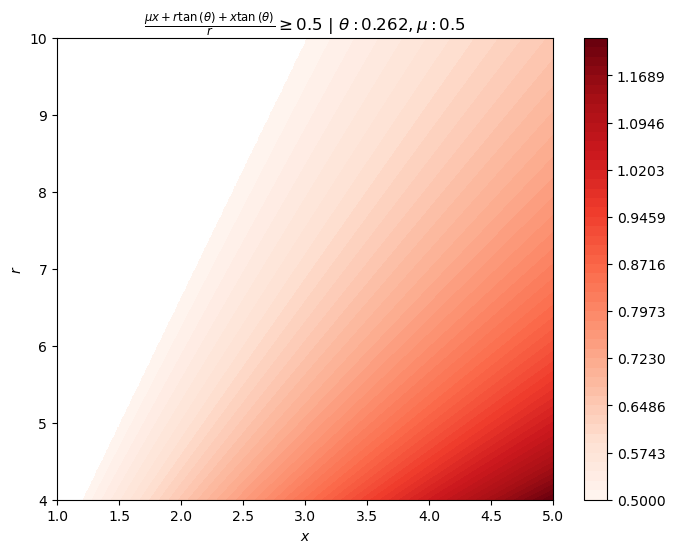

In [115]:
deg_theta = np.round(np.radians(15), 3)
sub_dict = {theta: deg_theta, mu: 0.5}
plot_sympy_expression(mu_l, x, r, (1,5), (4,10), sub_dict, above=0.5)

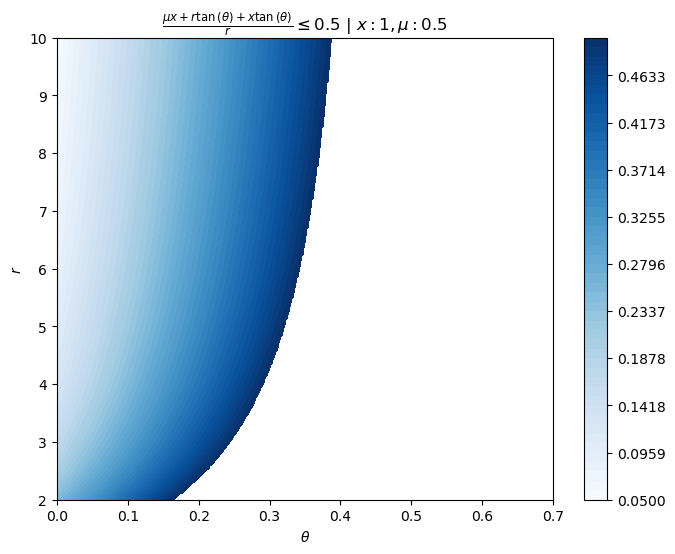

In [97]:
sub_dict = {x: 1, mu: 0.5}
plot_sympy_expression(mu_l, theta, r, (0,0.7), (2,10), sub_dict, below=0.5)

In [98]:
# apparent coeff of friction on right side:
mu_r = sp.simplify(s_R_y / s_R_x)
mu_r

\mu

In [99]:
sp.simplify(s_R_y + s_L_y)


F_a

In [100]:
sub_dict = {theta: np.radians(20), mu: 0.5, F_a:10, r:10, x:2}

In [101]:
s_L_y.subs(sub_dict).evalf()

5.17730298867813

In [102]:
s_R_y.subs(sub_dict).evalf()

4.82269701132187

In [103]:
s_R_x.subs(sub_dict).evalf()

9.64539402264373

In [104]:
s_L_x.subs(sub_dict).evalf()

9.64539402264373

In [105]:
mu_l.subs(sub_dict).evalf()

0.536764281119443

In [106]:
mu_r.subs(sub_dict).evalf()

0.500000000000000

In [107]:
F_mult.subs(sub_dict).evalf()

0.964539402264373

In [108]:
F_L_angle = sp.trigsimp(sp.atan(s_L_y / s_L_x))
F_L_angle

atan((\mu*x + r*tan(\theta) + x*tan(\theta))/r)

In [109]:
np.rad2deg(float(F_L_angle.subs(sub_dict).evalf()))

28.225314652483085

In [110]:
F_R_angle = sp.atan(s_R_y / s_R_x)
F_R_angle

atan(\mu)

In [111]:
np.rad2deg(float(F_R_angle.subs(sub_dict).evalf()))

26.56505117707799